# Numerical Differentiation

**Example**: Use forward, backward, and central difference approximation for estimating the first derivative of 

$$
    f(x) = -0.1x^{4} - 0.15x^{3} - 0.5x^{2} - 0.25x + 1.25
$$

at $x = 0.5$ using a step size $h = 0.5$.

**Solution**: 

Following block of code imports required packages.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Following block of code defines function for computing various approximation and true value of derivative.

In [3]:
def forward_diff(x,h,func):
    """
        Function for computing forward difference.
        Input:
        x - input at which derivative is desired
        h - step size
        func - python function which should return function value based on x.
    """
    slope = (func(x+h) - func(x)) / h
    return slope

def backward_diff(x,h,func):
    """
        Function for computing backward difference.
        Input:
        x - input at which derivative is desired
        h - step size
        func - python function which should return function value based on x.
    """
    slope = (func(x) - func(x-h)) / h
    return slope

def central_diff(x,h,func):
    """
        Function for computing central difference.
        Input:
        x - input at which derivative is desired
        h - step size
        func - python function which should return function value based on x.
    """
    slope = (func(x+h) - func(x-h)) /2/h
    return slope

def true_function(x):
    """
        Function which returns value of desired function at input x.
    """
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.25

def true_derivative(x):
    """
        Returns true derivative of function at input x.
    """
    return -0.4*x**3 - 0.45*x**2 - x - 0.25

Following block of code computes true and approximate value of derivate, and the error in the estimation using the functions defined in previous block

In [4]:
# Few vairables
x = 0.5
h = 0.5

# True value
true_value = true_derivative(x)
print("True value: {}\n".format(true_value))

# Forward difference
approx_value = forward_diff(x,h,true_function)
print("Forward difference:")
print("Approx value: {}".format(approx_value))
print("True error: {}\n".format((true_value - approx_value)/true_value))

# Backward difference
approx_value = backward_diff(x,h,true_function)
print("Backward difference:")
print("Approx value: {}".format(approx_value))
print("True error: {}\n".format((true_value - approx_value)/true_value))

# Central difference
approx_value = central_diff(x,h,true_function)
print("Central difference:")
print("Approx value: {}".format(approx_value))
print("True error: {}".format((true_value - approx_value)/true_value))

True value: -0.9125

Forward difference:
Approx value: -1.45
True error: -0.589041095890411

Backward difference:
Approx value: -0.55
True error: 0.39726027397260266

Central difference:
Approx value: -1.0
True error: -0.09589041095890413


Now, we will check the variation of error based on the step size

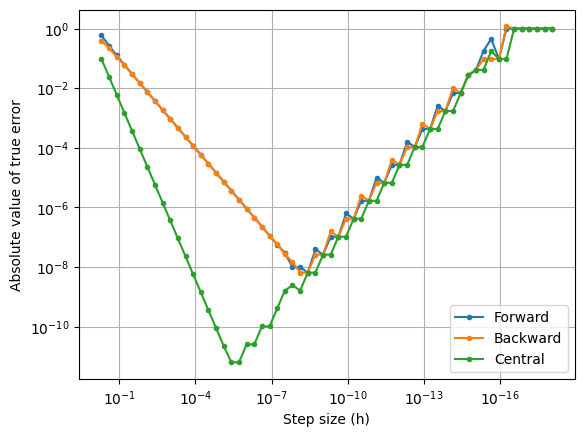

In [5]:
def error_estimation(func,method,x,step_sizes):
    """
        Function to compute error in the estimation for various step sizes
        Input:
        func - function which returns value of desired function at input x
        method - function which returns derivative estimation at x
        x - value at which derivative is required
        step_sizes - 1d numpy array containing step sizes for derivative estimation
    """
    
    # Initializing error array
    error = np.zeros(len(step_sizes))
    
    # Computing error for the given step sizes
    for index, step in enumerate(step_sizes):
        true_value = true_derivative(x)
        approx_value = method(x,step,func)
        error[index] = abs((true_value - approx_value)/true_value)
    
    return error

# Value at which derivative is required
x = 0.5

# Calculating step sizes
initial_step = 0.5
num_steps = 60
step_sizes = np.zeros(num_steps)
for i in range(num_steps):
    step_sizes[i] = initial_step/(2**i)

error_forward_diff = error_estimation(true_function,forward_diff,x,step_sizes)
error_backward_diff = error_estimation(true_function,backward_diff,x,step_sizes)
error_central_diff = error_estimation(true_function,central_diff,x,step_sizes)

# Plotting the error variation with step sizes for different methods
fig, ax = plt.subplots()
ax.plot(step_sizes, error_forward_diff, label="Forward", marker='.')
ax.plot(step_sizes, error_backward_diff, label="Backward", marker='.')
ax.plot(step_sizes, error_central_diff, label="Central", marker='.')
ax.set_xscale('log')
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xlabel("Step size (h)")
ax.set_ylabel("Absolute value of true error")
ax.legend(loc="lower right")
ax.grid()

As seen in the plot above, error in all the methods starts to increase after a specific step size but central difference is more accurate than forward and backward difference. A more robust estimate of derivate can be obtained by using [complex-step method](https://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/).